## Observations and Insights 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cd = mouse_metadata.merge(study_results,on='Mouse ID')

# Display the data table for preview
cd.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [140]:
# Checking the number of mice.
cd['Mouse ID'].nunique()

249

In [141]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cd[cd.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [142]:
# Optional: Get all the data for the duplicate mouse ID. 
cd[cd['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [143]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = cd[cd['Mouse ID'] != 'g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [144]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'var':grp.var(),'std':grp.std(),'sem':grp.sem()})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [124]:
plt.rcParams.update({'font.size':22})

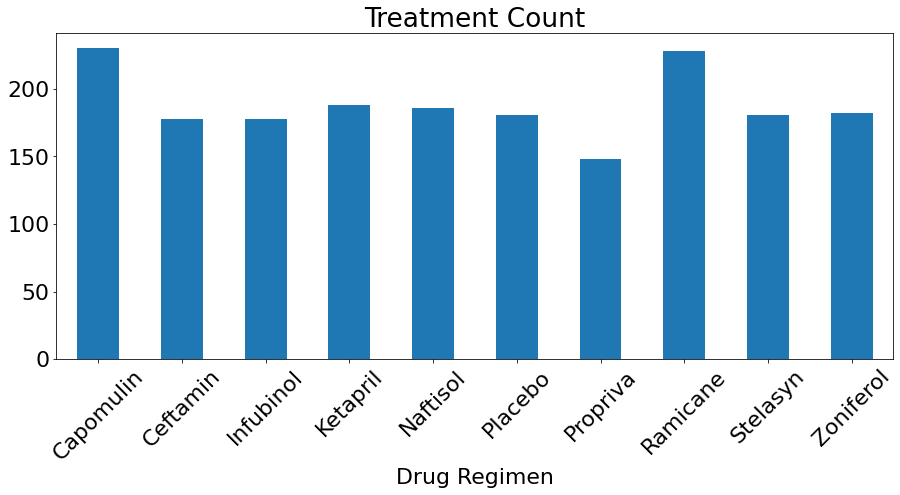

In [125]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pandas. 
df = clean.groupby('Drug Regimen').Sex.count()
df.plot.bar(figsize=(15,6),rot=45,title='Treatment Count')
plt.show()

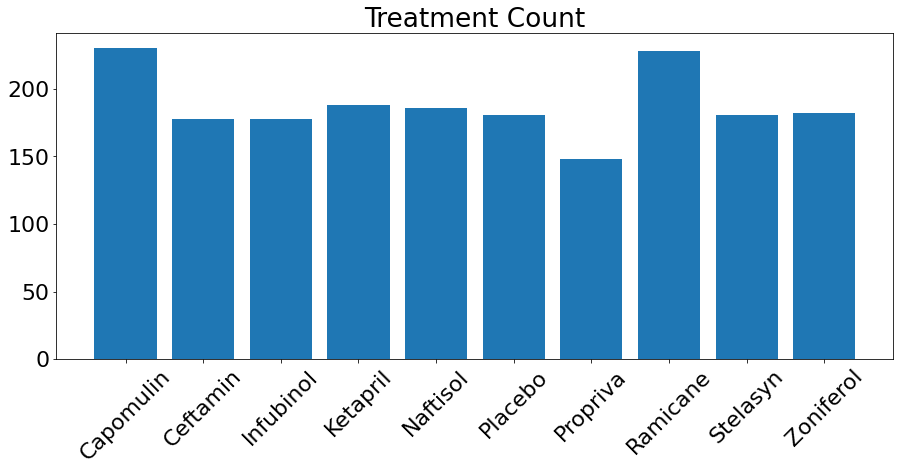

In [126]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.
plt.figure(figsize=[15,6])
plt.bar(df.index,df.values)
plt.xticks(rotation=45)
plt.title('Treatment Count')
plt.show()

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


<Figure size 1080x432 with 0 Axes>

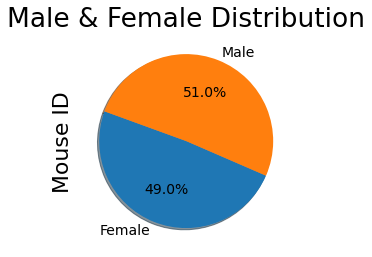

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(15,6))
#labels = {"Female", "Male"}
#gender_df.plot(kind="pie", y="Mouse ID", label=labels, autopct="%1.1f%%", fontsize=14, legend=False, shadow=True, startangle=160)

gender_df.plot(kind="pie", y="Mouse ID", labels = gender_df["Sex"], autopct="%1.1f%%", fontsize=14, legend=False, shadow=True, startangle=160)



plt.title("Male & Female Distribution")
plt.show()



## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxT = cd.groupby('Mouse ID').Timepoint.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxDf = cd.merge(maxT, on=['Mouse ID','Timepoint'])
maxDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = maxDf[maxDf['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumors.append(data)
    
    # add subset 
    iqr = data.quantile(.75) - data.quantile(.25)
    lower = data.quantile(.25) - 1.5*iqr
    upper = data.quantile(.75) + 1.5*iqr
    
    # Determine outliers using upper and lower bounds
    print(f'Potential outlier for {drug}: {data[(data<lower)|(data>upper)]}')

Potential outlier for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outlier for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


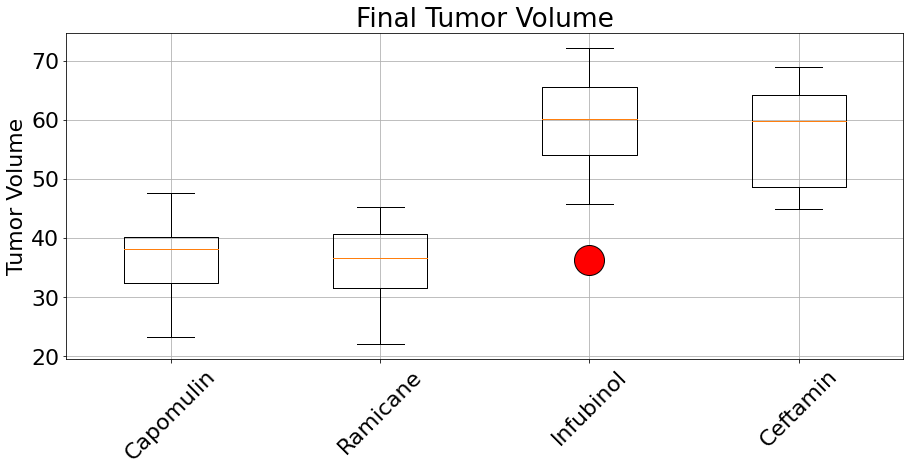

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=[15,6])
plt.boxplot(tumors, labels = drugs, flierprops={'markerfacecolor':'red','markersize':30})
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume')
plt.show()

## Line and Scatter Plots

In [132]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cd[cd['Drug Regimen']=='Capomulin']['Mouse ID'].drop_duplicates().values

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

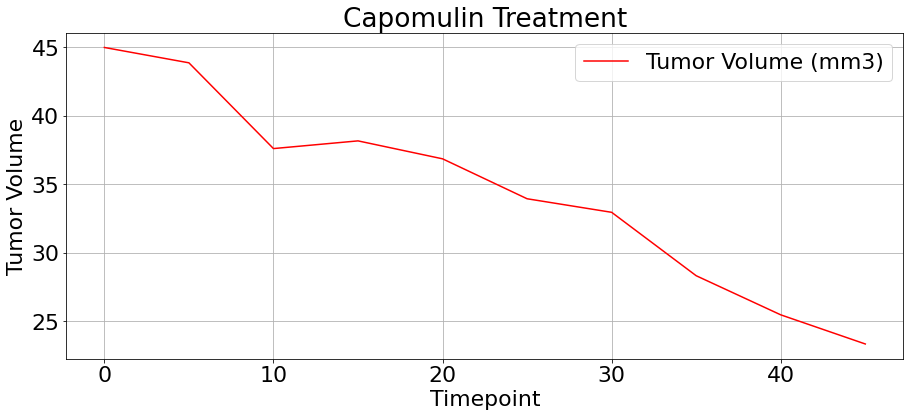

<Figure size 432x288 with 0 Axes>

In [133]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cd[cd['Mouse ID']=='s185'].plot('Timepoint', 'Tumor Volume (mm3)',
    figsize=(15,6),grid=True, ylabel='Tumor Volume',color='red',title='Capomulin Treatment')
plt.show()
plt.savefig('Capomulin Treatment')

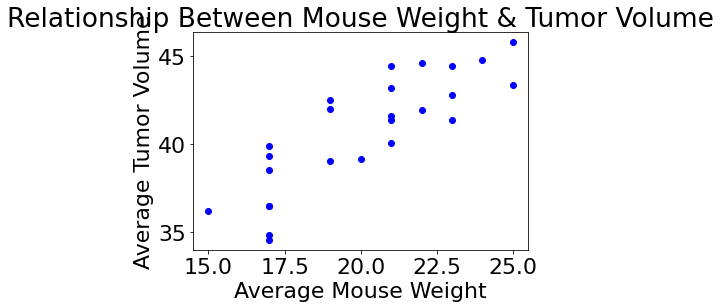

<Figure size 432x288 with 0 Axes>

In [134]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter = cd.loc[cd["Drug Regimen"] == "Capomulin"]
scatter.head()
scattertwo = scatter.groupby(["Mouse ID"]).mean().rename(columns={"Weight (g)":"Average Weight", "Tumor Volume (mm3)":"Average Tumor Volume"})
scattertwo.head()

plt.title("Relationship Between Mouse Weight & Tumor Volume")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(scattertwo["Average Weight"], scattertwo["Average Tumor Volume"], marker="o", color="blue")
plt.show()
plt.savefig('Capomulin Treatment')

## Correlation and Regression

In [135]:
# Calculate the correlation coefficient and linear regression model 
mouse_weight = scattertwo.iloc[:,0]
avg_tumor_volume = scattertwo.iloc[:,1]

# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The coorelation between both factors is {round(correlation[0],2)}")

The coorelation between both factors is -0.07


<function matplotlib.pyplot.show(close=None, block=None)>

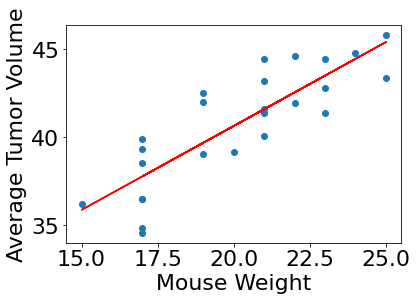

In [145]:
# import linregress
# from scipy.stats import linregress

x_values = scattertwo["Average Weight"]
y_values = scattertwo["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show

In [147]:
print("The line equation is as follows:")
print(line_eq)

The line equation is as follows:
y =0.95x + 21.55
